# Forecasting - Facebook Prophet

https://facebook.github.io/prophet/

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt





%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
pd.set_option('display.max_rows', 500)

import plotly.graph_objects as go

In [2]:
#attention might have problems with holiday package, 
#downgrate holidays via: pip install 'holidays==0.9.12'
from prophet import Prophet 

In [3]:
plt.style.use('fivethirtyeight')

## Trivial Forecast (rolling mean)

In [4]:
# the final trivial model is at the end of this file

df = pd.DataFrame({'X': np.arange(0,10)}) # generate an input df
df['y']=df.rolling(3).mean() # take the window and write the average as the result

In [5]:
df

,X,y
0,0,NaN
1,1,NaN
2,2,1.0
3,3,2.0
4,4,3.0
5,5,4.0
6,6,5.0
7,7,6.0
8,8,7.0
9,9,8.0


## Small Data Set

In [31]:
df_all = pd.read_csv('../data/processed/COVID_small_table.csv',sep=';')
df=df_all[['date','Germany']]
df=df.rename(columns={'date': 'ds',
                        'Germany': 'y'})

In [32]:
df.tail()

,ds,y
854,2022-05-25,26198811
855,2022-05-26,26200663
856,2022-05-27,26240639
857,2022-05-28,26243352
858,2022-05-29,26244107


In [33]:
df_small=df[:70]

In [34]:
df_small.tail()

,ds,y
65,2020-03-27,42288
66,2020-03-28,48582
67,2020-03-29,52547
68,2020-03-30,57298
69,2020-03-31,61913


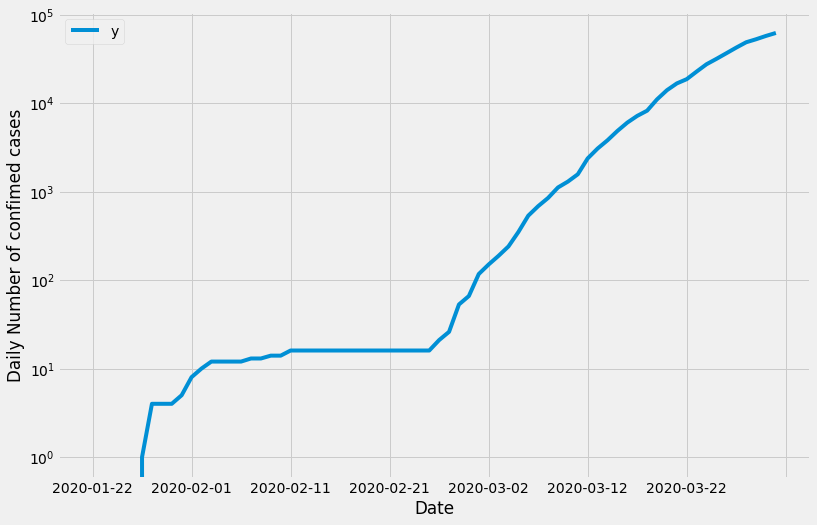

In [35]:
ax = df_small.set_index('ds').plot(figsize=(12, 8),
                             logy=True)
ax.set_ylabel('Daily Number of confimed cases')
ax.set_xlabel('Date')

plt.show()

In [36]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

#my_model = Prophet(interval_width=0.95) # piecwise linear model
my_model = Prophet(growth='logistic')   # logistic model

In [38]:
# the column 'cap':capacity for the model, is only mandatory for the logistic model
df_small['cap']=1000000.  
my_model.fit(df_small)

C:\Users\Viper\AppData\Local\Temp\ipykernel_5296\1051812146.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [39]:
future_dates = my_model.make_future_dataframe(periods=7, freq='D')
future_dates['cap']=1000000. # only mandatory for the logistic model
future_dates.tail()

,ds,cap
72,2020-04-03,1000000.0
73,2020-04-04,1000000.0
74,2020-04-05,1000000.0
75,2020-04-06,1000000.0
76,2020-04-07,1000000.0


In [40]:
# predict according to the scikit-learn standard

forecast = my_model.predict(future_dates)

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



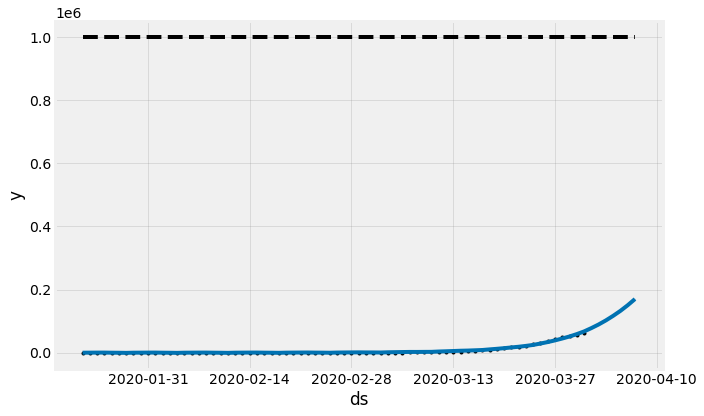

In [41]:
my_model.plot(forecast,
              uncertainty=True ); # since fbprohet is rendering the output

In [42]:
import plotly.offline as py
from prophet.plot import plot_plotly

fig = plot_plotly(my_model, forecast)  # This returns a plotly Figure

fig.update_layout(
    width=1024,
    height=900,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,5.5])
py.iplot(fig)

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



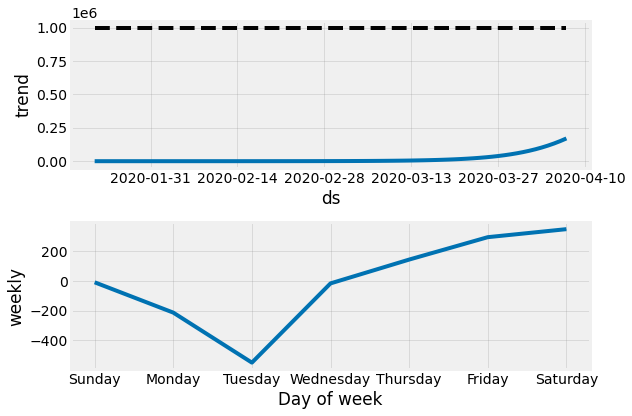

In [43]:
my_model.plot_components(forecast);

<AxesSubplot:xlabel='ds'>

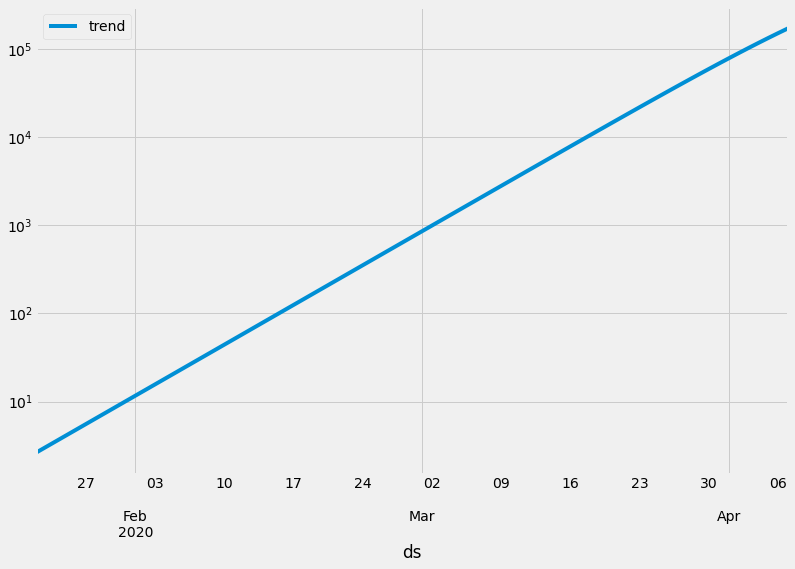

In [44]:
forecast[['ds','trend']].set_index('ds').plot(figsize=(12, 8),logy=True)

#### Prophet uses a linear Trend model with changepoint detection. By default, Prophet automatically detect the changepoints and allows the trend to adapt appropriately.

## Cross Validation

In [45]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(my_model, 
                         initial='40 days', # we take the first 30 days for training
                         period='1 days',  # every  days a new prediction run
                         horizon = '7 days') #we predict 7days into the future

INFO:prophet:Making 23 forecasts with cutoffs between 2020-03-02 00:00:00 and 2020-03-24 00:00:00


  0%|          | 0/23 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use

In [46]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-03,-0.574278,-40.771143,38.640723,188,2020-03-02
1,2020-03-04,-2.119500,-41.298081,36.593493,240,2020-03-02
2,2020-03-05,-1.070425,-40.854623,36.868911,349,2020-03-02
3,2020-03-06,3.972457,-35.608998,42.516349,534,2020-03-02
4,2020-03-07,6.842820,-33.422998,46.873946,684,2020-03-02


In [47]:
df_cv.sort_values(by=['cutoff','ds'])[0:12]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-03,-0.574278,-40.771143,38.640723,188,2020-03-02
1,2020-03-04,-2.119500,-41.298081,36.593493,240,2020-03-02
2,2020-03-05,-1.070425,-40.854623,36.868911,349,2020-03-02
3,2020-03-06,3.972457,-35.608998,42.516349,534,2020-03-02
4,2020-03-07,6.842820,-33.422998,46.873946,684,2020-03-02
5,2020-03-08,16.040681,-23.216436,56.397619,847,2020-03-02
6,2020-03-09,22.233038,-17.004796,60.123954,1112,2020-03-02
7,2020-03-04,-6.312930,-10.324666,-1.904635,240,2020-03-03
8,2020-03-05,-4.472690,-8.393494,-0.564015,349,2020-03-03
9,2020-03-06,-0.498036,-4.420272,3.527952,534,2020-03-03


In [48]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

In [49]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,7.135779e+05,844.735418,539.436026,0.196781,0.068428,0.322851,0.043478
1,2 days,2.552028e+06,1597.506814,1031.701021,0.237379,0.134854,0.360633,0.043478
2,3 days,7.022492e+06,2649.998420,1730.935239,0.269531,0.166855,0.387510,0.000000
3,4 days,1.763859e+07,4199.831623,2810.659035,0.313291,0.209483,0.420078,0.000000
4,5 days,4.534383e+07,6733.782980,4441.856836,0.363021,0.269879,0.457363,0.000000
5,6 days,1.054562e+08,10269.184812,6749.485405,0.412806,0.346071,0.492576,0.043478
6,7 days,2.261075e+08,15036.870400,10040.043736,0.499351,0.498198,0.552500,0.000000


smaller the horizon ---> better the forcast

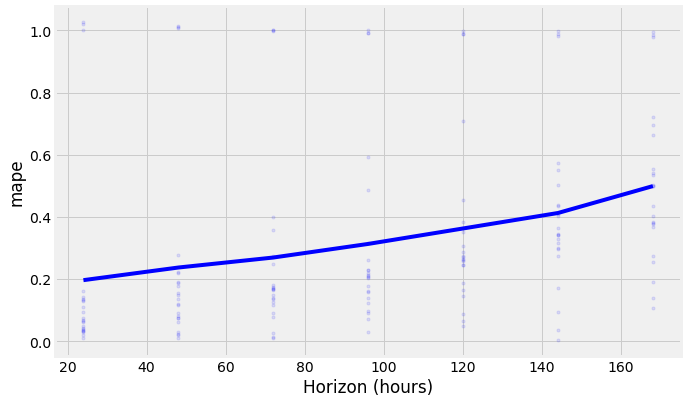

In [50]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape',)

## Diagonalplot

### gives a good understanding for the under and over estimation w.r.t. magnitude

In [51]:
horizon='7 days'
df_cv['horizon']=df_cv.ds-df_cv.cutoff

date_vec=df_cv[df_cv['horizon']==horizon]['ds']
y_hat=df_cv[df_cv['horizon']==horizon]['yhat']
y=df_cv[df_cv['horizon']==horizon]['y']

In [52]:
df_cv_7=df_cv[df_cv['horizon']==horizon]
df_cv_7.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,horizon
132,2020-03-27,63355.804374,63201.755547,63507.393054,42288,2020-03-20,7 days
139,2020-03-28,74601.677026,74442.145839,74757.117357,48582,2020-03-21,7 days
146,2020-03-29,78890.549082,78619.004867,79190.542359,52547,2020-03-22,7 days
153,2020-03-30,89025.108547,88693.009188,89357.574014,57298,2020-03-23,7 days
160,2020-03-31,102922.811904,102593.902943,103258.178412,61913,2020-03-24,7 days


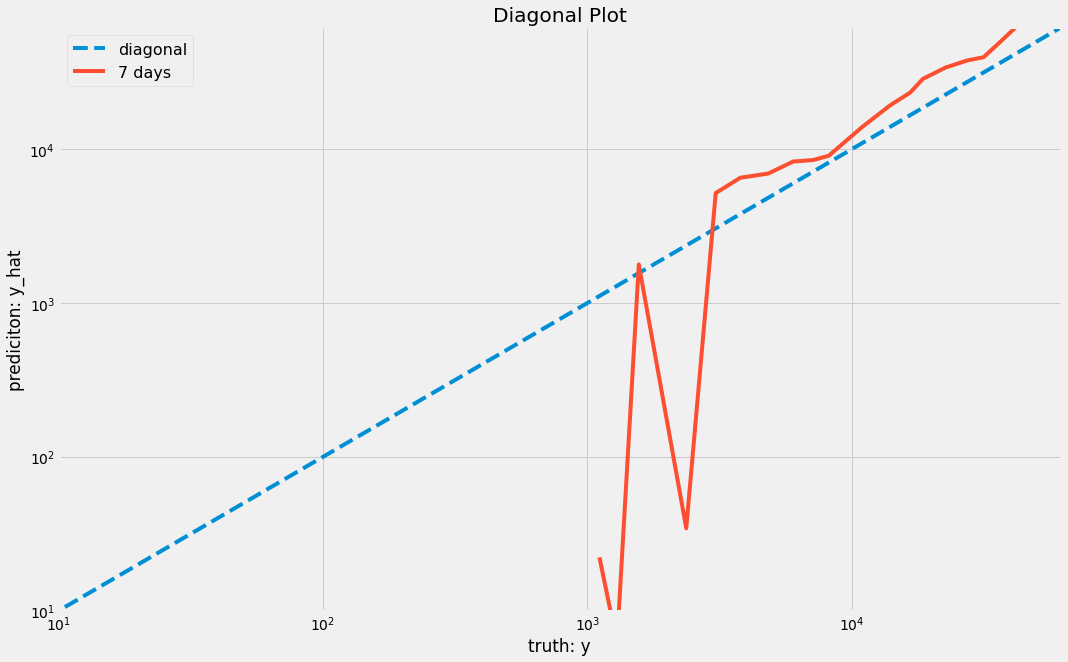

In [53]:
fig, ax = plt.subplots(1, 1)


ax.plot(np.arange(max(y)),np.arange(max(y)),'--',label='diagonal')
ax.plot(y,y_hat,'-',label=horizon)  # horizon is a np.timedelta objct

ax.set_title('Diagonal Plot')
ax.set_ylim(10, max(y))

ax.set_xlabel('truth: y')
ax.set_ylabel('prediciton: y_hat')
ax.set_yscale('log')

ax.set_xlim(10, max(y))
ax.set_xscale('log')
ax.legend(loc='best',
           prop={'size': 16});

## Trivial Forcast

Example trivial forecast, prediciton 7 days into the future

Normally we start with trivial forcast and after getting the first results we go to more complex models.

In [60]:
def mean_absolute_percentage_error(y_true, y_pred): 
    ''' MAPE calculation '''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [54]:
parse_dates=['date']
df_all = pd.read_csv('../data/processed/COVID_small_table.csv',sep=';',parse_dates=parse_dates)
df_trivial=df_all[['date','Germany']]
df_trivial=df_trivial.rename(columns={'date': 'ds',
                        'Germany': 'y'})

In [56]:
df_trivial=df_trivial[:70]

In [57]:
df_trivial.tail()

,ds,y
65,2020-03-27,42288
66,2020-03-28,48582
67,2020-03-29,52547
68,2020-03-30,57298
69,2020-03-31,61913


In [58]:
df_trivial['y_mean_r3']=df_trivial.y.rolling(3).mean() # take the average of 3 days

In [61]:
df_trivial['cutoff']=df_trivial['ds'].shift(7)
df_trivial['y_hat']=df_trivial['y_mean_r3'].shift(7)
df_trivial['horizon']=df_trivial['ds']-df_trivial['cutoff']
print('MAPE: '+str(mean_absolute_percentage_error(df_trivial['y_hat'].iloc[12:,], df_trivial['y'].iloc[12:,])))
df_trivial

MAPE: 452.11531768109137


,ds,y,y_mean_r3,cutoff,y_hat,horizon
0,2020-01-22,0,NaN,NaT,NaN,NaT
1,2020-01-23,0,NaN,NaT,NaN,NaT
2,2020-01-24,0,0.000000,NaT,NaN,NaT
3,2020-01-25,0,0.000000,NaT,NaN,NaT
4,2020-01-26,0,0.000000,NaT,NaN,NaT
5,2020-01-27,1,0.333333,NaT,NaN,NaT
6,2020-01-28,4,1.666667,NaT,NaN,NaT
7,2020-01-29,4,3.000000,2020-01-22,NaN,7 days
8,2020-01-30,4,4.000000,2020-01-23,NaN,7 days
9,2020-01-31,5,4.333333,2020-01-24,0.000000,7 days
